In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [21]:
sp500 = yf.Ticker("^GSPC")

In [22]:
sp500 = sp500.history(period="max")

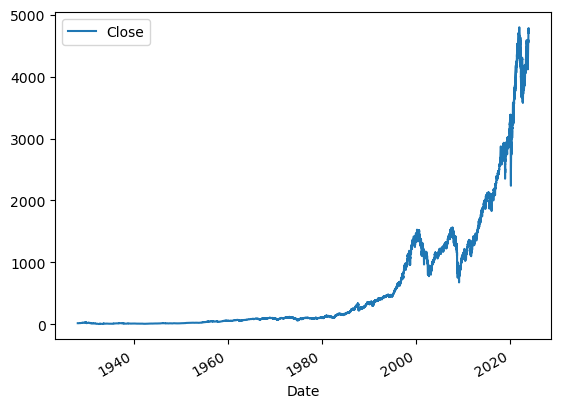

In [23]:
sp500.plot.line(y="Close", use_index=True);

In [24]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [25]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [26]:
sp500.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,2387632000


In [27]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
# creates a tomorrow column that takes in the close value of the next day
sp500.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,4704.810059
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,2387632000,NaN


In [29]:
sp500["Target"] =(sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500.tail()
#1 when price goes up, 0 when price goes down

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078,0
2024-01-02 00:00:00-05:00,4745.200195,4754.330078,4722.669922,4742.830078,3743050000,4704.810059,0
2024-01-03 00:00:00-05:00,4725.069824,4729.290039,4699.709961,4704.810059,2387632000,NaN,0


In [30]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [57]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
# will test against the last 100 days
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [58]:
test

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-08-11 00:00:00-04:00,4450.689941,4476.229980,4443.979980,4464.049805,3753290000,4489.720215,1
2023-08-14 00:00:00-04:00,4458.129883,4490.330078,4453.439941,4489.720215,3896410000,4437.859863,0
2023-08-15 00:00:00-04:00,4478.870117,4478.870117,4432.189941,4437.859863,3832250000,4404.330078,0
2023-08-16 00:00:00-04:00,4433.790039,4449.950195,4403.549805,4404.330078,3753910000,4370.359863,0
2023-08-17 00:00:00-04:00,4416.319824,4421.169922,4364.830078,4370.359863,3943700000,4369.709961,0
...,...,...,...,...,...,...,...
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078,0


In [59]:
preds = model.predict(test[predictors])

In [60]:
preds = pd.Series(preds, index=test.index)
preds

Date
2023-08-11 00:00:00-04:00    1
2023-08-14 00:00:00-04:00    1
2023-08-15 00:00:00-04:00    1
2023-08-16 00:00:00-04:00    1
2023-08-17 00:00:00-04:00    0
                            ..
2023-12-27 00:00:00-05:00    0
2023-12-28 00:00:00-05:00    0
2023-12-29 00:00:00-05:00    0
2024-01-02 00:00:00-05:00    0
2024-01-03 00:00:00-05:00    0
Length: 100, dtype: int64

In [61]:
precision_score(test["Target"], preds)

0.5517241379310345

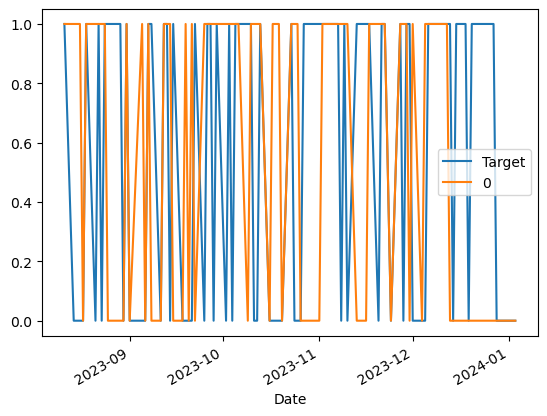

In [62]:
comparisons = pd.concat([test["Target"], preds], axis=1)
comparisons.plot();

In [64]:
#Back Testing
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    comparisons = pd.concat([test["Target"], preds], axis=1)
    return comparisons

In [72]:
#Every trading year is 250 days. Model will be trained over 10 years of data
# Step is basically a year, model will train over time period
# Take first 10 years of data, then predict for 11th year values, then 11 years to predict 12th year...
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [73]:
predictions = backtest(sp500, model, predictors)

In [74]:
predictions["Predictions"].value_counts()

Predictions
0    3465
1    2602
Name: count, dtype: int64

In [75]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [76]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.534366
0    0.465634
Name: count, dtype: float64

In [77]:
#Look at rolling means, add additional predictors
horizons = [2,5,60,250,1000]
new_predictors= []
for horizon in horizons:
    rolling_mean = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"]/rolling_mean["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [78]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.204993,530.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0,1.000185,2.0,1.003175,5.0,1.070893,39.0,1.117603,137.0,1.204974,530.0
2023-12-29 00:00:00-05:00,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,4742.830078,0,0.998585,1.0,0.999372,4.0,1.065854,38.0,1.113476,137.0,1.201116,529.0


In [79]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.073161,38.0,1.117612,136.0,1.203740,529.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.072714,38.0,1.118166,137.0,1.204993,530.0
2023-12-28 00:00:00-05:00,4786.439941,4793.299805,4780.979980,4783.350098,2698860000,4769.830078,0,1.000185,2.0,1.003175,5.0,1.070893,39.0,1.117603,137.0,1.204974,530.0


In [80]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    comparisons = pd.concat([test["Target"], preds], axis=1)
    return comparisons

In [82]:
predictions = backtest(sp500, model, new_predictors)

In [83]:
predictions["Predictions"].value_counts()

Predictions
0.0    4238
1.0     828
Name: count, dtype: int64

In [84]:
precision_score(predictions["Target"], predictions["Predictions"])

0.572463768115942